In [2]:
# load in packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import matplotlib.dates as mdates
from datetime import datetime

from sklearn.model_selection import train_test_split

In [3]:
# Our dataset comes from https://www.kaggle.com/datasets/guslovesmath/us-pollution-data-200-to-2022?resource=download. 
# It includes 665,414 observations of pollution level in various states from 2000 to 2023.   
pollution = pd.read_csv("data/pollution_2000_2023.csv")
pollution = pollution[pollution.columns[1:]] # The first column is an empty column of indices, so we remove this

In [ ]:
# Output a list of states contained in the dataframe, sorted by the number of data entries collected for each state
pollution.groupby('State').size().sort_values(ascending=False)

State
California              201244
Pennsylvania             54142
Texas                    38980
Arizona                  25118
New York                 22685
Virginia                 20571
Colorado                 16198
North Carolina           14449
Illinois                 13803
Ohio                     13376
Maryland                 13086
Hawaii                   12904
Utah                     12104
Oklahoma                 11919
New Jersey               11762
Arkansas                 11277
District Of Columbia     10517
Connecticut              10255
Iowa                     10063
Kansas                    9686
Missouri                  9653
Maine                     9378
Florida                   8738
Louisiana                 8390
Massachusetts             7581
Nevada                    7109
Kentucky                  6212
Indiana                   5855
Wyoming                   5574
Oregon                    5300
North Dakota              5194
Rhode Island              5194
Ne

In [4]:
# We choose to examine Pennsylvania only; Create a new dataframe restricted to data from PA
pollution_pa = pollution[pollution['State'] == 'Pennsylvania']
pollution_pa.head()

,Date,Address,State,County,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,...,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
17385,2000-03-31,CARNEGIE SCIENCE CENTER - 1 ALLEGHENY RD,Pennsylvania,Allegheny,Pittsburgh,0.000000,0.000,22,0,0.000000,...,0,0.0,12.041667,33.0,7,47.0,32.875000,51.0,21,48
17386,2000-04-06,CARNEGIE SCIENCE CENTER - 1 ALLEGHENY RD,Pennsylvania,Allegheny,Pittsburgh,0.030471,0.049,11,45,0.220833,...,0,3.0,8.875000,20.0,7,29.0,13.956522,37.0,22,35
17387,2000-04-07,CARNEGIE SCIENCE CENTER - 1 ALLEGHENY RD,Pennsylvania,Allegheny,Pittsburgh,0.002412,0.005,13,5,0.616667,...,9,13.0,20.625000,70.0,14,94.0,32.958333,43.0,9,41
17388,2000-04-08,CARNEGIE SCIENCE CENTER - 1 ALLEGHENY RD,Pennsylvania,Allegheny,Pittsburgh,0.025882,0.034,21,31,0.354167,...,6,8.0,11.666667,19.0,1,27.0,19.125000,33.0,5,31
17389,2000-04-09,CARNEGIE SCIENCE CENTER - 1 ALLEGHENY RD,Pennsylvania,Allegheny,Pittsburgh,0.023765,0.037,8,34,0.091667,...,4,2.0,6.666667,13.0,15,19.0,11.625000,30.0,21,28


In [5]:
# To help run code faster, randomly select 80% of the data
pollution_pa_train, pollution_pa_test = train_test_split(pollution_pa, test_size=.2, shuffle=True, random_state=200)

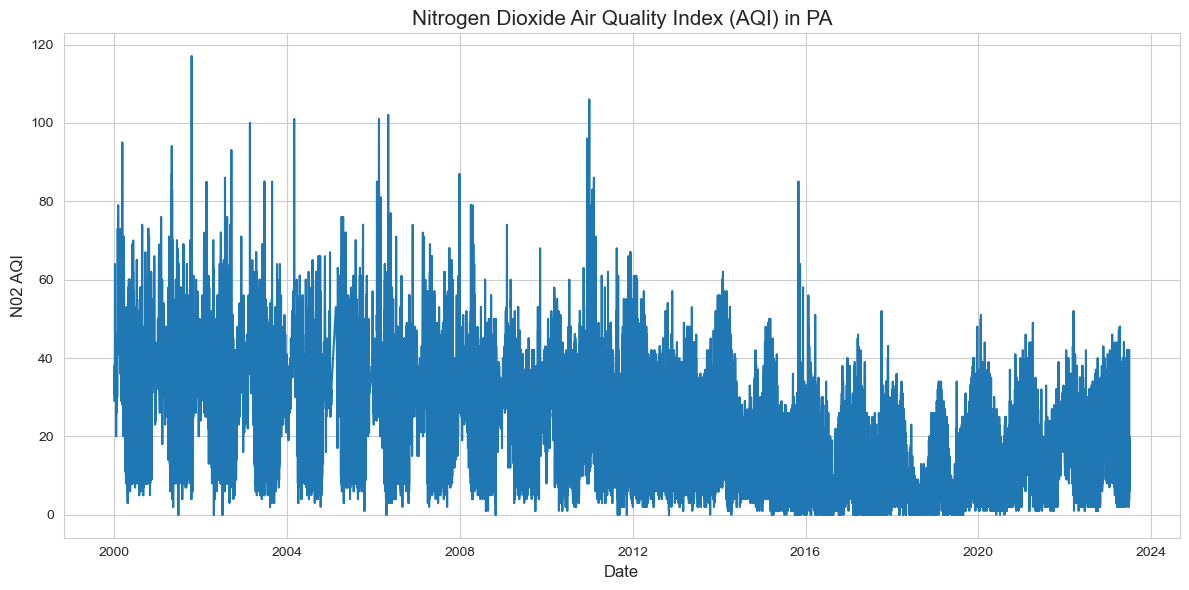

In [6]:
# Sorted list of all the dates of data entries in the PA pollution train set
dates_sorted = np.sort(mdates.date2num(pollution_pa_train.sort_values(by='Date')['Date']))
# Sorted list of all the NO2 Air Quality Index values
no2_aqis_sorted = pollution_pa_train.sort_values(by='Date')['NO2 AQI']

# Plot NO2 AQI against date
fig,ax = plt.subplots(figsize=(12,6))
ax.plot(dates_sorted, no2_aqis_sorted)

# Make x-ticks nicer
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel('Date', fontsize=12)
plt.ylabel('N02 AQI', fontsize=12)

plt.title("Nitrogen Dioxide Air Quality Index (AQI) in PA", fontsize=15)

plt.tight_layout()
plt.show()

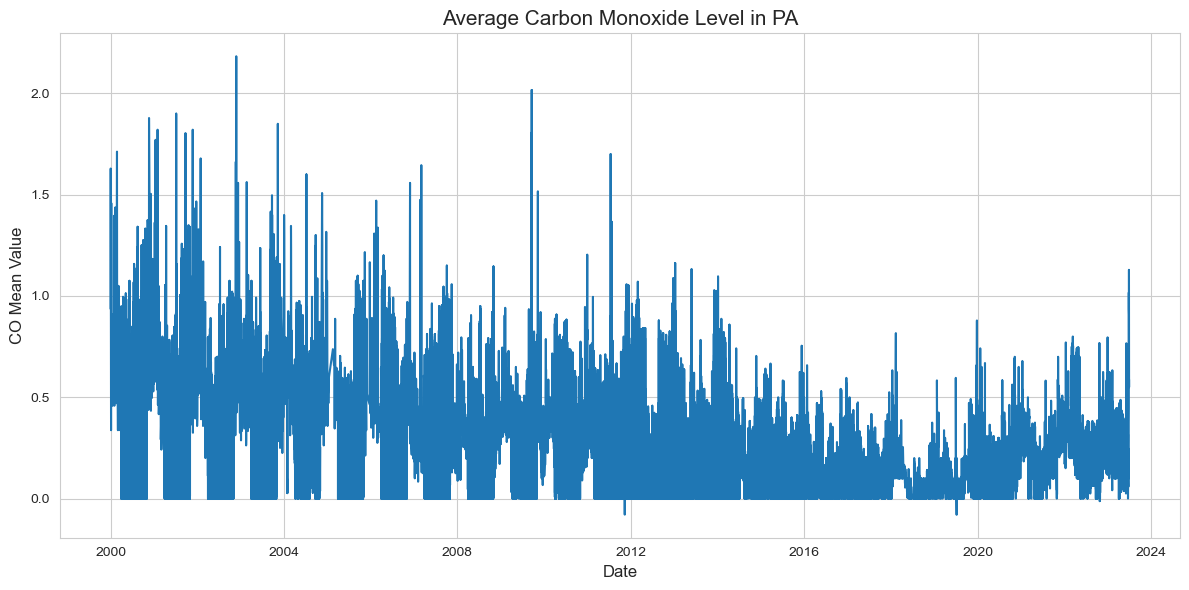

In [7]:
# Sorted list of all the CO mean values
co_mean_sorted = pollution_pa_train.sort_values(by='Date')['CO Mean']

# Plot CO mean vals against date
fig,ax = plt.subplots(figsize=(12,6))
ax.plot(dates_sorted, co_mean_sorted)

# Make x-ticks nicer
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel('Date', fontsize=12)
plt.ylabel('CO Mean Value', fontsize=12)

plt.title("Average Carbon Monoxide Level in PA", fontsize=15)

plt.tight_layout()
plt.show()

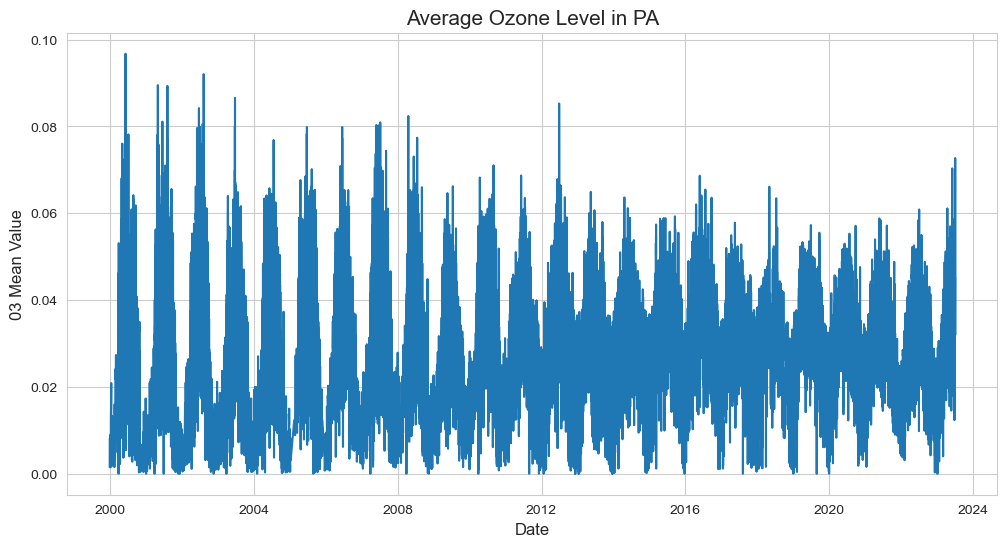

In [8]:
# Sorted list of all the O3 mean values
o3_mean_sorted = pollution_pa_train.sort_values(by='Date')['O3 Mean']

# Plot O3 mean vals against date
fig,ax = plt.subplots(figsize=(12,6))
ax.plot(dates_sorted, o3_mean_sorted)

# Make x-ticks nicer
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel('Date', fontsize=12)
plt.ylabel('03 Mean Value', fontsize=12)

plt.title("Average Ozone Level in PA", fontsize=15)

plt.show()

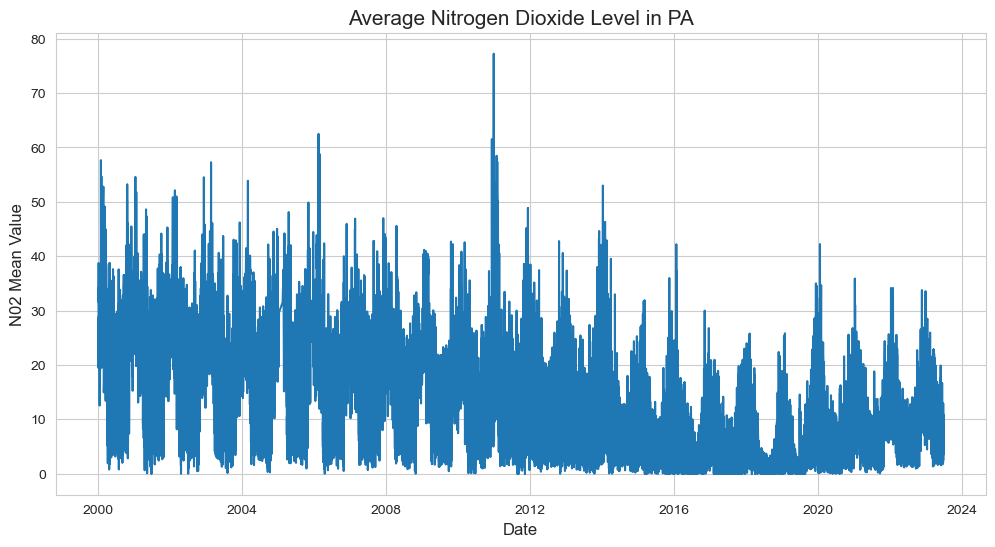

In [9]:
# Sorted list of all the NO2 mean values
no2_mean_sorted = pollution_pa_train.sort_values(by='Date')['NO2 Mean']

# Plot NO2 mean vals against date
fig,ax = plt.subplots(figsize=(12,6))
ax.plot(dates_sorted, no2_mean_sorted)

# Make x-ticks nicer
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel('Date', fontsize=12)
plt.ylabel('N02 Mean Value', fontsize=12)

plt.title("Average Nitrogen Dioxide Level in PA", fontsize=15)

plt.show()